## I would love to know if there is a way to group all the regions together in an easier category instead of having them all as separate features. I couldn't quite find a simple code to avoid having to make the categorical values continuous manually. Otherwise, I would like to incorporate the Suburb and Seller information as part of the model as well. I am still having trouble interpreting the importance of the coeficients. I thought they were supposed to explain how well that variable helps to explain variance in the model, but when you take out the variables with smaller numbers, it makes the R squared value decrease. Additionally, I am not sure what a negative coeficient represents unless it means there is an inverse relationship between that variable and price.

## Future work: transform date column and get dummies for suburb and seller

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [99]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Melbourne_housing_FULL.csv')
print (df.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [100]:
df = df.dropna()
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [101]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [102]:
df['Suburb'].unique() #lots
df['SellerG'].unique() #lots
df['Regionname'].unique()


array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

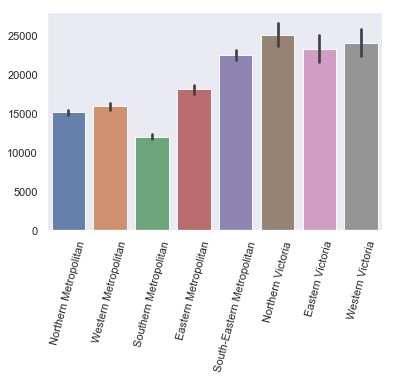

In [103]:
sns.set(style='dark')
sns.barplot(df['Regionname'].values, df['Regionname'].index, alpha = .9)
plt.xticks(rotation = 75)
plt.show()

In [104]:
features = pd.get_dummies(df['Regionname'])
print (features)

       Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
2                         0                 0                      1   
4                         0                 0                      1   
6                         0                 0                      1   
11                        0                 0                      1   
14                        0                 0                      1   
18                        0                 0                      1   
24                        0                 0                      1   
25                        0                 0                      1   
30                        0                 0                      1   
32                        0                 0                      1   
35                        0                 0                      1   
37                        0                 0                      1   
38                        0                 0                   

In [211]:
features= pd.get_dummies(df['Regionname'])

features['Nmetro']=np.where((df['Regionname'].isin(['Northern Metropolitan'])),1,0)
df['Nmetro'] = features['Nmetro']
features['Wmetro']=np.where((df['Regionname'].isin(['Western Metropolitan'])), 1,0)
df['Wmetro']=features['Wmetro']
features['Smetro']=np.where((df['Regionname'].isin(['Southern Metropolitan'])), 1,0)
df['Smetro']=features['Smetro']
features['Emetro']=np.where((df['Regionname'].isin(['Eastern Metropolitan'])), 1,0)
df['Emetro']=features['Emetro']
features['SEmetro']=np.where((df['Regionname'].isin(['South-Eastern Metropolitan'])), 1, 0)
df['SEmetro']=features['SEmetro']
features['NVic']= np.where((df['Regionname'].isin(['Northern Victoria'])), 1,0)
df['NVic']=features['NVic']
features['EVic']=np.where((df['Regionname'].isin(['Eastern Victoria'])), 1,0)
df['EVic']=features['EVic']
features['WVic']= np.where((df['Regionname'].isin(['Western Victoria'])), 1,0)
df['WVic']=features['WVic']
print(pd.crosstab(features['WVic'], df['Regionname']))

Regionname  Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
WVic                                                                        
0                            982                51                   2612   
1                              0                 0                      0   

Regionname  Northern Victoria  South-Eastern Metropolitan  \
WVic                                                        
0                          62                         371   
1                           0                           0   

Regionname  Southern Metropolitan  Western Metropolitan  Western Victoria  
WVic                                                                       
0                            2707                  2059                 0  
1                               0                     0                43  


In [134]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


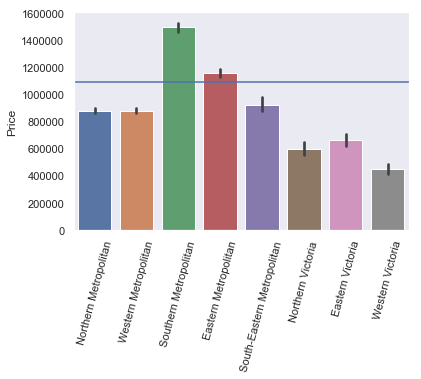

In [238]:
sns.set(style = 'dark')
sns.barplot(df['Regionname'].values, df['Price'])
plt.axhline(mean)
plt.xticks(rotation = 75)
plt.show()


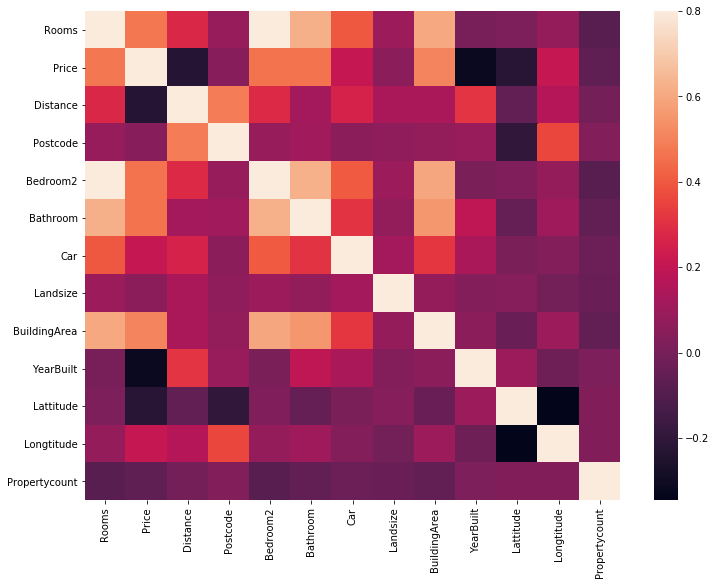

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8)
plt.show()

In [212]:
target = df['Price'].values.reshape(-1,1)
data = df[['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Nmetro', 'Wmetro', 'Smetro', 'Emetro', 'NVic', 'EVic', 'WVic'  ]] 

In [213]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state = 20)

In [214]:
regr = linear_model.LinearRegression()
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([0.51564324, 0.6267664 , 0.6262147 , 0.55353917, 0.56372367,
       0.49085797, 0.41667669, 0.55197645, 0.56526157, 0.59196009])

In [215]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print (regr.coef_)
print (regr.intercept_)
print (regr.score(x_train, y_train))

[[ 1.07840613e+05  2.06111917e+05  3.54739932e+04  1.73299873e+01
   2.38553429e+03 -6.37727102e+03 -6.46190527e+05  3.85474897e+05
   3.08729801e+05  2.42110784e+05  6.29885073e+05  2.76681869e+05
   3.92025622e+04 -3.32132976e+05  5.13344018e+04]]
[-68157842.9841239]
0.5854038162802822


In [246]:
y_pred = regr.predict(data)



In [249]:
print(data)
print(y_pred)

       Rooms  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Lattitude  \
2          2       1.0  0.0     156.0          79.0     1900.0  -37.80790   
4          3       2.0  0.0     134.0         150.0     1900.0  -37.80930   
6          4       1.0  2.0     120.0         142.0     2014.0  -37.80720   
11         3       2.0  0.0     245.0         210.0     1910.0  -37.80240   
14         2       1.0  2.0     256.0         107.0     1890.0  -37.80600   
18         2       1.0  2.0     220.0          75.0     1900.0  -37.80100   
24         3       2.0  2.0     214.0         190.0     2005.0  -37.80850   
25         2       2.0  1.0       0.0          94.0     2009.0  -37.80780   
30         2       1.0  2.0     238.0          97.0     1890.0  -37.80900   
32         3       2.0  1.0     113.0         110.0     1880.0  -37.80560   
35         3       1.0  1.0     138.0         105.0     1890.0  -37.80210   
37         2       1.0  1.0     150.0          73.0     1985.0  -37.80110   